Question:- Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

1) Delivery_time -> Predict delivery time using sorting time 
2) Salary_hike -> Build a prediction model for Salary_hike

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_profiling as pp
import sweetviz as sv
import seaborn as sns
import statsmodels.formula.api as smf

EDA Testing stepWise

1) Delivery_time -> Predict delivery time using sorting time 

1. Reading the Data sets file i.e (DATA SOURCING)

In [2]:
data = pd.read_csv("C:/Users/0004IW744/Desktop/Python/Assignments/4.Simple Linear Regression/Salary_Data.csv")
time = pd.read_csv("C:/Users/0004IW744/Desktop/Python/Assignments/4.Simple Linear Regression/delivery_time.csv")

2. Cleaning the Data by Checking:- Missing Values, Incorrect Format, Incorrect Headers, Anomalies/Outliers

Missing Value check

In [3]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


Data type checking

In [4]:
time.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

Checking missing values

In [5]:
time.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

Renaming the Columns if not correct

In [6]:
time[time.duplicated()]

,Delivery Time,Sorting Time


# Data visualization

C:\Users\0004IW744\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

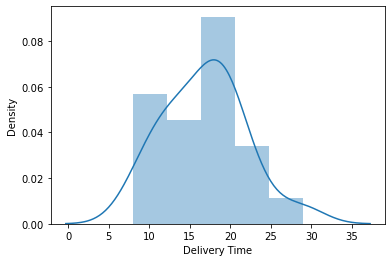

In [10]:
sns.distplot(time['Delivery Time'])

C:\Users\0004IW744\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

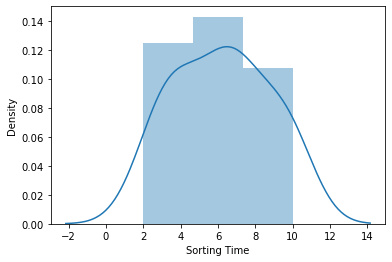

In [11]:
sns.distplot(time['Sorting Time'])

# 1)Delivery_time -> Predict delivery time using sorting time

Renaming the column name as we have space inbetween

In [24]:
time = time.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis =1) 

# Correlation Analysis

In [25]:
time.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

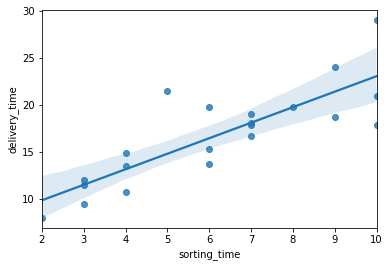

In [26]:
sns.regplot(x=time['sorting_time'],y=time['delivery_time'])

# Model Building

In [27]:
model=smf.ols("delivery_time~sorting_time",data=time).fit()

# Model Testing, finding independent varibles and independent variable,intercet,slope


In [28]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [29]:
model.tvalues,  model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

Hence, p-value is less than 0.05 it is significant to find the value(y)

In [30]:
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

# Different transformations applying

Exponential

In [33]:
model_exp=smf.ols("delivery_time~np.exp(sorting_time)",data=time).fit()

In [36]:
model_exp.params

Intercept               15.083578
np.exp(sorting_time)     0.000393
dtype: float64

In [37]:
model_exp.pvalues, model_exp.tvalues

(Intercept               1.117304e-11
 np.exp(sorting_time)    3.964511e-03
 dtype: float64,
 Intercept               14.406456
 np.exp(sorting_time)     3.277108
 dtype: float64)

In [40]:
model_exp.rsquared, model_exp.rsquared_adj

(0.361117702270909, 0.3274923181799042)

log transformation

In [41]:
model_log = smf.ols("delivery_time~np.log(sorting_time)", data = time).fit()

In [42]:
model_log.params

Intercept               1.159684
np.log(sorting_time)    9.043413
dtype: float64

In [43]:
model_log.pvalues, model_log.tvalues

(Intercept               0.641980
 np.log(sorting_time)    0.000003
 dtype: float64,
 Intercept               0.472460
 np.log(sorting_time)    6.586789
 dtype: float64)

In [44]:
model_log.rsquared, model_log.rsquared_adj

(0.6954434611324223, 0.6794141696130761)

square root transformation

In [45]:
model_sqrt = smf.ols("delivery_time~np.sqrt(sorting_time)", data = time).fit()

In [46]:
model_sqrt.params

Intercept               -2.518837
np.sqrt(sorting_time)    7.936591
dtype: float64

In [47]:
model_sqrt.pvalues, model_sqrt.tvalues

(Intercept                0.410857
 np.sqrt(sorting_time)    0.000003
 dtype: float64,
 Intercept               -0.840911
 np.sqrt(sorting_time)    6.592434
 dtype: float64)

In [51]:
model_sqrt.rsquared, model_sqrt.rsquared_adj

(0.6958062276308671, 0.6797960290851233)

In above all we can see the model with square root and model both have nearly same the r^2 value, 
So we can build with any of this 

# Perdict for the sorting time take 10, 8 ,5

In [52]:
Predict_time = pd.Series([10,8,5])

In [56]:
data_pred=pd.DataFrame(Predict_time,columns=['sorting_time'])
data_pred

,sorting_time
0,10
1,8
2,5


In [57]:
model.predict(data_pred)

0    23.072933
1    19.774893
2    14.827833
dtype: float64

In [59]:
model_sqrt.predict(data_pred)

0    22.578867
1    19.929232
2    15.227920
dtype: float64

# 2) Salary_hike -> Build a prediction model for Salary_hike

C:\Users\0004IW744\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

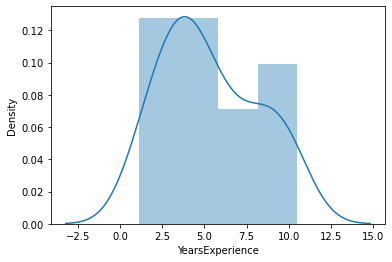

In [215]:
sns.distplot(data['YearsExperience'])

C:\Users\0004IW744\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

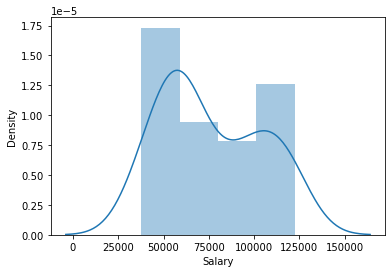

In [216]:
sns.distplot(data['Salary'])

In [217]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

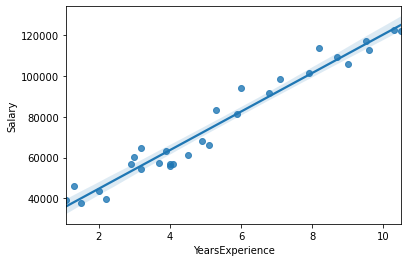

In [218]:
sns.regplot(x=data['YearsExperience'],y=data['Salary'])

In [226]:
model1=smf.ols("Salary~YearsExperience",data=data).fit()

In [227]:
model1.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [229]:
model1.tvalues,model1.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [230]:
model1.rsquared , model1.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [232]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 12 Dec 2021   Prob (F-statistic):           1.14e-20
Time:                        22:27:29   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Transformation

Using exponential

In [187]:
model2=smf.ols("Salary~np.exp(YearsExperience)",data=data).fit()

In [188]:
model2.params

Intercept                  67568.624969
np.exp(YearsExperience)        2.136040
dtype: float64

In [189]:
model2.tvalues,model2.pvalues

(Intercept                  16.620427
 np.exp(YearsExperience)     5.006889
 dtype: float64,
 Intercept                  4.888835e-16
 np.exp(YearsExperience)    2.721588e-05
 dtype: float64)

In [190]:
model2.rsquared , model2.rsquared_adj   # Not Advisable model...

(0.47238440560728734, 0.45354099152183325)

Using log

In [191]:
model3=smf.ols("Salary~np.log(YearsExperience)",data=data).fit()

In [193]:
model3.params

Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64

In [194]:
model3.tvalues,model3.pvalues

(Intercept                   2.895135
 np.log(YearsExperience)    12.791989
 dtype: float64,
 Intercept                  7.268813e-03
 np.log(YearsExperience)    3.250155e-13
 dtype: float64)

In [195]:
model3.rsquared , model3.rsquared_adj  

(0.8538888828756969, 0.8486706286926861)

Using Sqrt

In [196]:
model4=smf.ols("Salary~np.sqrt(YearsExperience)",data=data).fit()

In [197]:
model4.params

Intercept                  -16055.769117
np.sqrt(YearsExperience)    41500.680583
dtype: float64

In [199]:
model4.tvalues,model4.pvalues

(Intercept                   -3.262308
 np.sqrt(YearsExperience)    19.437148
 dtype: float64,
 Intercept                   2.906965e-03
 np.sqrt(YearsExperience)    8.565358e-18
 dtype: float64)

In [200]:
model4.rsquared , model4.rsquared_adj

(0.9310009544993526, 0.9285367028743294)

By comparing all the values Model1 has the R^2 value with 95% which is best one to predict

# Perdict for the Salary based on YearofExperience 10, 8 ,7

In [202]:
predict_sal = pd.Series([10, 8 , 7])

In [203]:
data_pred2=pd.DataFrame(predict_sal,columns=['YearsExperience'])
data_pred2

,YearsExperience
0,10
1,8
2,7


In [234]:
model1.predict(data_pred2)

0    120291.823413
1    101391.898770
2     91941.936449
dtype: float64

model1 is fine as r-squared value is high